<a href="https://colab.research.google.com/github/kr7/udm/blob/main/udm_dontesi_fa_spam_felismeresre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Döntési fa spam felismerésre**

Importáljuk a szükséges szoftverkönyvtárakat:

In [1]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier

Egy publikus adatbázissal fogunk dolgozni, amelynek leírása itt érhető el: https://archive.ics.uci.edu/dataset/94/spambase

Adatok letöltése:

In [2]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data

--2025-10-03 14:21:05--  https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘spambase.data’

spambase.data           [  <=>               ] 686.47K  2.72MB/s    in 0.2s    

2025-10-03 14:21:06 (2.72 MB/s) - ‘spambase.data’ saved [702942]



A virtuális gép operációs rendszerének parancsait használva belenézünk az adatokba:

In [3]:
!ls

sample_data  spambase.data


In [4]:
!head spambase.data

0,0.64,0.64,0,0.32,0,0,0,0,0,0,0.64,0,0,0,0.32,0,1.29,1.93,0,0.96,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.778,0,0,3.756,61,278,1
0.21,0.28,0.5,0,0.14,0.28,0.21,0.07,0,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0,1.59,0,0.43,0.43,0,0,0,0,0,0,0,0,0,0,0,0,0.07,0,0,0,0,0,0,0,0,0,0,0,0,0.132,0,0.372,0.18,0.048,5.114,101,1028,1
0.06,0,0.71,0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0,1.16,0.06,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.06,0,0,0.12,0,0.06,0.06,0,0,0.01,0.143,0,0.276,0.184,0.01,9.821,485,2259,1
0,0,0,0,0.63,0,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0,0,0.31,0,0,3.18,0,0.31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.137,0,0.137,0,0,3.537,40,191,1
0,0,0,0,0.63,0,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0,0,0.31,0,0,3.18,0,0.31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.135,0,0.135,0,0,3.537,40,191,1
0,0,0,0,1.85,0,0,1.85,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

Az adatok betöltése numpy tömbbe:

In [5]:
data_with_labels = np.loadtxt('spambase.data', delimiter=',')

In [6]:
np.shape(data_with_labels)

(4601, 58)

Az oszlopok elnevezéseinek betöltése:

In [7]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.names

--2025-10-03 14:21:06--  https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.names
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘spambase.names’

spambase.names          [ <=>                ]   3.48K  --.-KB/s    in 0s      

2025-10-03 14:21:06 (909 MB/s) - ‘spambase.names’ saved [3566]



In [8]:
!head -n 50 spambase.names

| SPAM E-MAIL DATABASE ATTRIBUTES (in .names format)
|
| 48 continuous real [0,100] attributes of type word_freq_WORD 
| = percentage of words in the e-mail that match WORD,
| i.e. 100 * (number of times the WORD appears in the e-mail) / 
| total number of words in e-mail.  A "word" in this case is any 
| string of alphanumeric characters bounded by non-alphanumeric 
| characters or end-of-string.
|
| 6 continuous real [0,100] attributes of type char_freq_CHAR
| = percentage of characters in the e-mail that match CHAR,
| i.e. 100 * (number of CHAR occurences) / total characters in e-mail
|
| 1 continuous real [1,...] attribute of type capital_run_length_average
| = average length of uninterrupted sequences of capital letters
|
| 1 continuous integer [1,...] attribute of type capital_run_length_longest
| = length of longest uninterrupted sequence of capital letters
|
| 1 continuous integer [1,...] attribute of type capital_run_length_total
| = sum of length of uninterrupted sequences of

In [9]:
column_names = []
with open('spambase.names') as f:
  for i in range(33):
    f.readline()

  for i in range(57):
    line = f.readline()
    column_names.append(line.split(':')[0])

In [10]:
column_names

['word_freq_make',
 'word_freq_address',
 'word_freq_all',
 'word_freq_3d',
 'word_freq_our',
 'word_freq_over',
 'word_freq_remove',
 'word_freq_internet',
 'word_freq_order',
 'word_freq_mail',
 'word_freq_receive',
 'word_freq_will',
 'word_freq_people',
 'word_freq_report',
 'word_freq_addresses',
 'word_freq_free',
 'word_freq_business',
 'word_freq_email',
 'word_freq_you',
 'word_freq_credit',
 'word_freq_your',
 'word_freq_font',
 'word_freq_000',
 'word_freq_money',
 'word_freq_hp',
 'word_freq_hpl',
 'word_freq_george',
 'word_freq_650',
 'word_freq_lab',
 'word_freq_labs',
 'word_freq_telnet',
 'word_freq_857',
 'word_freq_data',
 'word_freq_415',
 'word_freq_85',
 'word_freq_technology',
 'word_freq_1999',
 'word_freq_parts',
 'word_freq_pm',
 'word_freq_direct',
 'word_freq_cs',
 'word_freq_meeting',
 'word_freq_original',
 'word_freq_project',
 'word_freq_re',
 'word_freq_edu',
 'word_freq_table',
 'word_freq_conference',
 'char_freq_;',
 'char_freq_(',
 'char_freq_[',
 '

Az osztálycímkét és az e-mail-ek egyéb tulajdonságait leíró attribútumokat külön tömbbe tároljuk, majd felosztjuk az adatok tanító és teszt adatokra:

In [11]:
data = data_with_labels[:,:-1]
labels = data_with_labels[:,-1]

In [12]:
test_indices = np.array(range(int(len(data)/5)))*5
train_indices = [i for i in range(len(data)) if i not in test_indices]

data_train = data[train_indices]
data_test = data[test_indices]
labels_train = labels[train_indices]
labels_test = labels[test_indices]

A modell tanítása

In [13]:
model = DecisionTreeClassifier(max_depth = 2)
model.fit(data_train, labels_train)

DecisionTreeClassifier(max_depth=2)

A modell pontossága a teszt adatokon:

In [14]:
pred = model.predict(data_test)
np.sum(pred==labels_test)/len(labels_test)

np.float64(0.85)

A modell pontosság a tanító adatokon:

In [15]:
np.sum(model.predict(data_train)==labels_train)/len(labels_train)

np.float64(0.8704156479217604)

A modell ábrázolása:

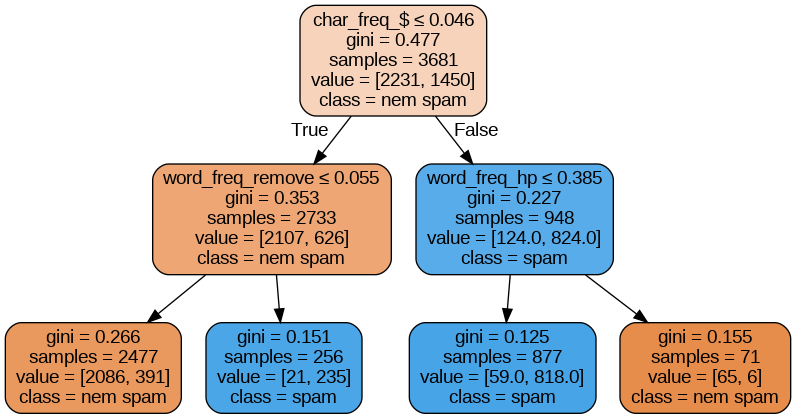

In [16]:
from six import StringIO
from sklearn.tree import export_graphviz
import pydot
from IPython.display import Image

dot_data = StringIO()
export_graphviz(model, out_file=dot_data,
                class_names = ['nem spam', 'spam'],
                filled=True, rounded=True,
                special_characters=True,
                feature_names=column_names)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())